In [1]:
!nvidia-smi

Sun Feb 14 06:35:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 43kB/s 


In [6]:
import tensorflow as tf

In [7]:
tf.__version__

'2.4.1'

In [8]:
# import the libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [9]:
# re-size all the images 
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train_tea'
valid_path = '/content/drive/MyDrive/test_tea'


In [10]:
# Importing the InceptionV3 library 

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [11]:
# Now training the existing weights
for layer in inception.layers:
    layer.trainable = False

In [12]:
  #for getting number of output classes
folders = glob('/content/drive/MyDrive/train_tea/*')

In [13]:
folders

['/content/drive/MyDrive/train_tea/tea_leaf_blight',
 '/content/drive/MyDrive/train_tea/tea_red_leaf_spot',
 '/content/drive/MyDrive/train_tea/tea_red_scab',
 '/content/drive/MyDrive/train_tea/tea_healthy']

In [14]:
# our layers
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# model object
model = Model(inputs=inception.input, outputs=prediction)

In [16]:

# structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [17]:
# cost and optimization method used
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Image Data Generator to import images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train_tea',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 364 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test_tea',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 156 images belonging to 4 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
12/12 [==============================] - 316s 26s/step - loss: 3.9188 - accuracy: 0.5146 - val_loss: 0.9113 - val_accuracy: 0.9103
Epoch 2/20
12/12 [==============================] - 63s 5s/step - loss: 0.8955 - accuracy: 0.8748 - val_loss: 1.9777 - val_accuracy: 0.8846
Epoch 3/20
12/12 [==============================] - 63s 6s/step - loss: 0.8228 - accuracy: 0.8949 - val_loss: 0.8236 - val_accuracy: 0.9103
Epoch 4/20
12/12 [==============================] - 62s 5s/step - loss: 0.3576 - accuracy: 0.9555 - val_loss: 0.5717 - val_accuracy: 0.9295
Epoch 5/20
12/12 [==============================] - 62s 5s/step - loss: 0.0716 - accuracy: 0.9875 - val_loss: 0.6555 - val_accuracy: 0.9295
Epoch 6/20
12/12 [==============================] - 63s 5s/step - loss: 0.0620 - accuracy: 0.9816 - val_loss: 0.3808 - val_accuracy: 0.9295
Epoch 7/20
12/12 [==============================] - 63s 5s/step - loss: 0.0495 - accuracy: 0.9919 - val_loss: 0.3532 - val_accuracy: 0.9423
Epoch 8/20
12/12 [

In [22]:
import matplotlib.pyplot as plt

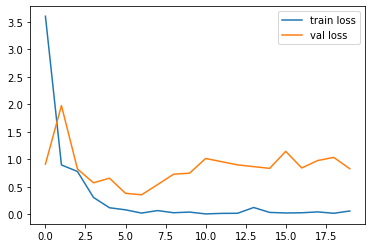

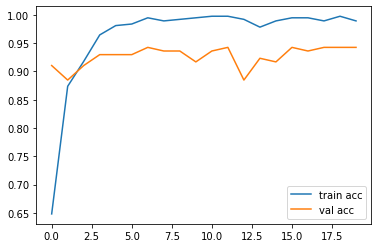

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
from tensorflow.keras.models import load_model

model.save('model_inception.hdf5')

In [30]:
y_pred = model.predict(test_set)

In [26]:
y_pred

array([[1.19231517e-35, 1.73199321e-33, 1.52541743e-22, 1.00000000e+00],
       [9.92872168e-25, 1.52082891e-20, 5.25743728e-14, 1.00000000e+00],
       [1.00000000e+00, 1.44677317e-29, 6.55758508e-16, 1.11628928e-19],
       [2.74899352e-26, 1.34887377e-04, 9.99865055e-01, 1.73726722e-15],
       [1.33154049e-27, 1.00000000e+00, 9.52908042e-16, 2.38892199e-22],
       [1.21022718e-36, 1.00000000e+00, 1.61886628e-18, 1.13882616e-21],
       [3.55054826e-36, 2.09766617e-38, 4.94525173e-28, 1.00000000e+00],
       [1.00000000e+00, 2.32751658e-32, 1.10040598e-17, 1.30448008e-22],
       [1.00277425e-15, 9.99955177e-01, 3.87382606e-05, 6.06955564e-06],
       [0.00000000e+00, 9.14885417e-34, 2.59877248e-24, 1.00000000e+00],
       [3.21476006e-11, 9.99553144e-01, 5.41005960e-08, 4.46886494e-04],
       [9.17073282e-35, 9.99768436e-01, 3.25094024e-16, 2.31532060e-04],
       [0.00000000e+00, 1.00000000e+00, 1.04833672e-19, 4.30621080e-26],
       [5.01166062e-29, 1.50333791e-23, 5.81121704e